In [1]:
file.copy('/kaggle/input/kodama-lib/KO', '/kaggle/working/', recursive = TRUE)

[1] TRUE

In [2]:
custom_lib <- "/kaggle/working/KO"  
default_lib <- .libPaths()[1] 
#
packages <- list.dirs(custom_lib, full.names = TRUE, recursive = FALSE)

# move packages from custom to default library path
for (pkg in packages) {
  pkg_name <- basename(pkg)  
  target_path <- file.path(default_lib, pkg_name)
  
  # check if the package already exists in the default path
  if (!dir.exists(target_path)) {
    file.copy(pkg, default_lib, recursive = TRUE)
  } else {
    message(paste("package already exists in default library:", pkg_name))
  }
}
print('-----------------All packages are moved----------------------')

[1] "-----------------All packages are moved----------------------"


In [3]:
custom_lib <- "/kaggle/input/library-data/my_r_libs"  
default_lib <- .libPaths()[1] 

packages <- list.dirs(custom_lib, full.names = TRUE, recursive = FALSE)

# move packages from custom to default library path
for (pkg in packages) {
  pkg_name <- basename(pkg)  
  target_path <- file.path(default_lib, pkg_name)
  
  # check if the package already exists in the default path
  if (!dir.exists(target_path)) {
    file.copy(pkg, default_lib, recursive = TRUE)
  } else {
    message(paste("package already exists in default library:", pkg_name))
  }
}
print('-----------------All packages are moved----------------------')

package already exists in default library: bslib

package already exists in default library: digest

package already exists in default library: e1071

package already exists in default library: evaluate

package already exists in default library: knitr

package already exists in default library: KODAMA

package already exists in default library: KODAMAextra

package already exists in default library: openssl

package already exists in default library: Rcpp

package already exists in default library: RcppArmadillo

package already exists in default library: RcppEigen

package already exists in default library: reticulate

package already exists in default library: rmarkdown

package already exists in default library: RSpectra

package already exists in default library: tinytex

package already exists in default library: uuid

package already exists in default library: withr

package already exists in default library: xfun

package already exists in default library: yaml



[1] "-----------------All packages are moved----------------------"


In [7]:
library(Seurat)
library(KODAMA)
library(KODAMAextra)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: minerva

Loading required package: Rtsne

Loading required package: umap

Loading required package: Matrix


Attaching package: ‘KODAMA’


The following object is masked from ‘package:umap’:

    umap.defaults


Loading required package: parallel

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: e1071

Warning message:
“no DISPLAY variable so Tk is not available”


In [13]:
url <- "https://cf.10xgenomics.com/samples/spatial-exp/2.0.0/CytAssist_FFPE_Human_Breast_Cancer/CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.tar.gz"
destfile <- "CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.tar.gz"
download.file(url, destfile)


In [14]:
url <- "https://cf.10xgenomics.com/samples/spatial-exp/2.0.0/CytAssist_FFPE_Human_Breast_Cancer/CytAssist_FFPE_Human_Breast_Cancer_spatial.tar.gz"
destfile <- "spatial.tar.gz"
download.file(url, destfile)


In [15]:
url <-"https://cf.10xgenomics.com/samples/spatial-exp/2.0.0/CytAssist_FFPE_Human_Breast_Cancer/CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.h5"
destfile <- "Human_Breast_Cancer_filtered_feature_bc_matrix.h5"
download.file(url, destfile)


In [18]:
dir.create('janesick')

In [19]:
file.rename('/kaggle/working/CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.tar.gz','janesick/CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.tar.gz')

[1] TRUE

In [20]:
file.rename('/kaggle/working/Human_Breast_Cancer_filtered_feature_bc_matrix.h5','janesick/Human_Breast_Cancer_filtered_feature_bc_matrix.h5')

[1] TRUE

In [21]:
file.rename('/kaggle/working/spatial.tar.gz','janesick/spatial.tar.gz')

[1] TRUE

In [22]:
untar('/kaggle/working/janesick/CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.tar.gz')

In [25]:
untar('/kaggle/working/janesick/spatial.tar.gz')

In [26]:
file.rename('/kaggle/working/spatial','janesick/spatial')

[1] TRUE

In [27]:
file.rename('/kaggle/working/filtered_feature_bc_matrix','janesick/filtered_feature_bc_matrix')

[1] TRUE

_______________________


In [10]:
matrix<-Read10X_h5('/kaggle/working/janesick/Human_Breast_Cancer_filtered_feature_bc_matrix.h5

In [11]:
img=Read10X_Image('/kaggle/working/janesick/spatial')

In [12]:
st <- CreateSeuratObject(counts = matrix, assay = "Spatial")

In [13]:
st@images$spatial <- img


In [14]:
dim(st)

[1] 18085  4992

In [15]:
head(st@meta.data)

orig.ident    nCount_Spatial nFeature_Spatial
AACACCTACTATCGAA-1 SeuratProject 12675          6022            
AACACGTGCATCGCAC-1 SeuratProject  7886          3979            
AACACTTGGCAAGGAA-1 SeuratProject 32614          9017            
AACAGGAAGAGCATAG-1 SeuratProject  7484          4183            
AACAGGATTCATAGTT-1 SeuratProject  6694          3693            
AACAGGCCAACGATTA-1 SeuratProject  4864          2948

# QC

In [16]:
# calculating the log10 of genes per umi
st$log10GenesPerUMI <- log10(st$nFeature_Spatial) / log10(st$nCount_Spatial)

In [17]:
# calculating the mitochondrial ratio 
st$mitoRatio <- PercentageFeatureSet(object = st, pattern = "^MT-")

In [18]:
# proportion of mitoratio
st$mitoRatio <- st@meta.data$mitoRatio / 100

In [19]:
head(st@meta.data)

orig.ident    nCount_Spatial nFeature_Spatial
AACACCTACTATCGAA-1 SeuratProject 12675          6022            
AACACGTGCATCGCAC-1 SeuratProject  7886          3979            
AACACTTGGCAAGGAA-1 SeuratProject 32614          9017            
AACAGGAAGAGCATAG-1 SeuratProject  7484          4183            
AACAGGATTCATAGTT-1 SeuratProject  6694          3693            
AACAGGCCAACGATTA-1 SeuratProject  4864          2948            
                   log10GenesPerUMI mitoRatio 
AACACCTACTATCGAA-1 0.9212256        0.03392505
AACACGTGCATCGCAC-1 0.9237635        0.02447375
AACACTTGGCAAGGAA-1 0.8762925        0.02173913
AACAGGAAGAGCATAG-1 0.9347865        0.02872795
AACAGGATTCATAGTT-1 0.9324810        0.04182850
AACAGGCCAACGATTA-1 0.9410180        0.03248355

In [42]:
# making all figures bigger
options(repr.plot.width = 15, repr.plot.height = 10)

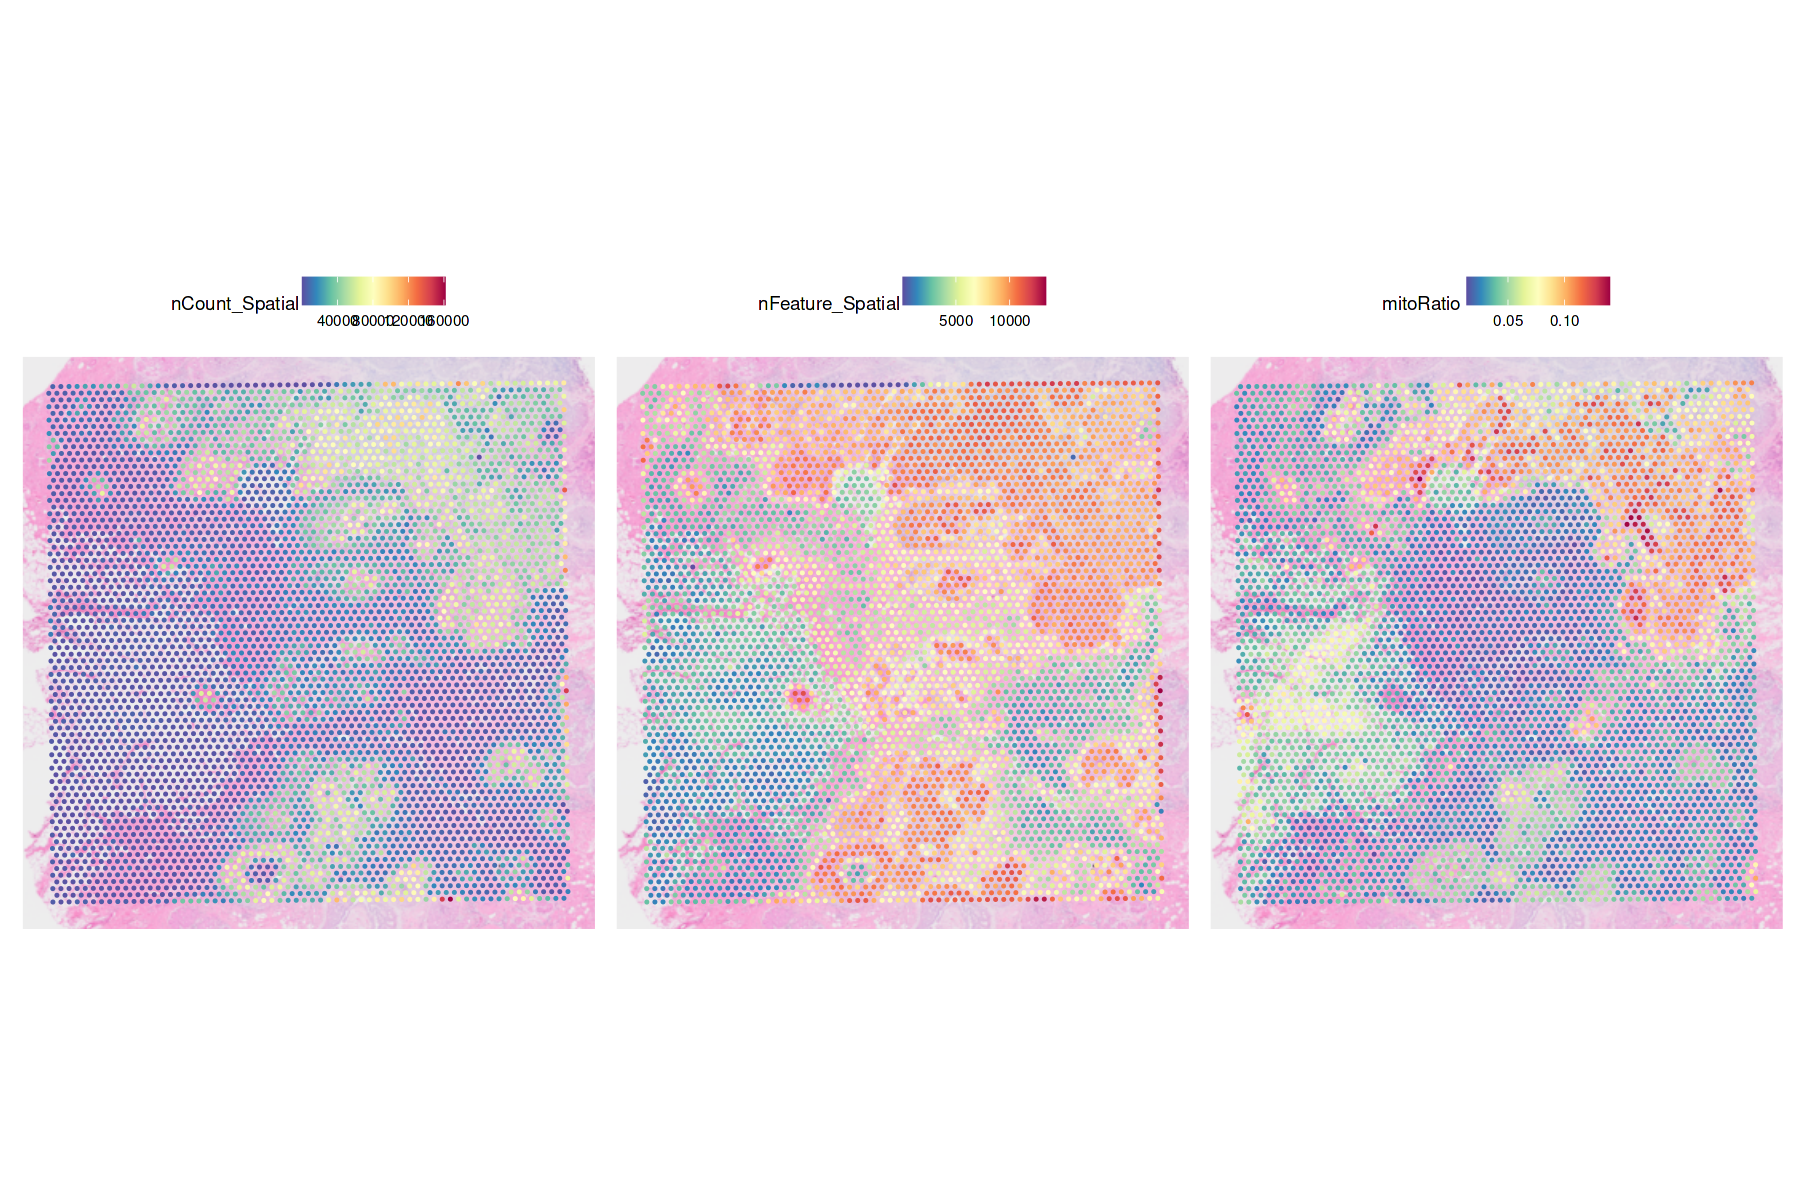

In [21]:
SpatialFeaturePlot(st, features=c('nCount_Spatial','nFeature_Spatial','mitoRatio'))

Warning message:
“Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead.”


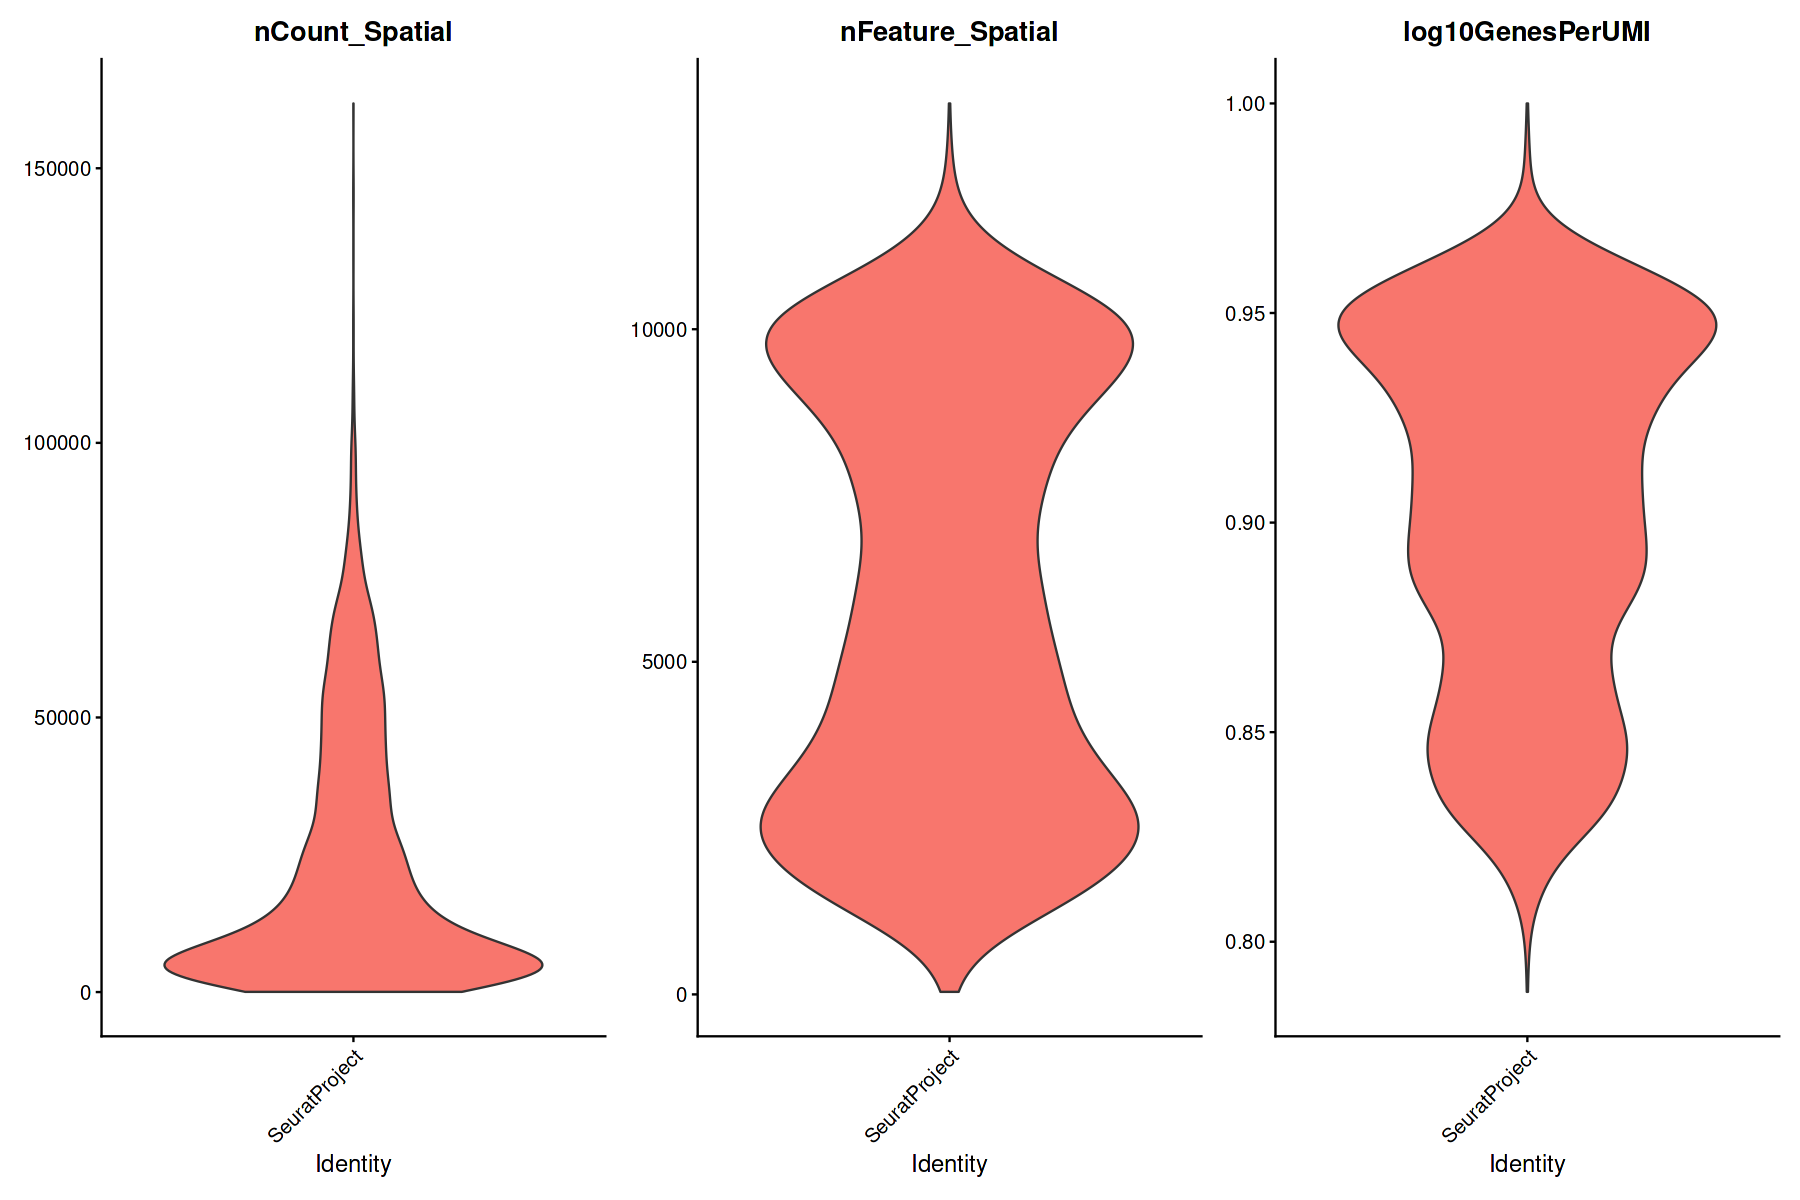

In [22]:
# Violin plot for nCount_Spatial, nFeature_Spatial, log10GenesPerUMI, and mitoRatio
VlnPlot(st, features = c("nCount_Spatial", "nFeature_Spatial", "log10GenesPerUMI"), pt.size = 0)


In [ ]:
st1 <- subset(st1, 
                  subset = nFeature_Spatial > 200 & 
                           nFeature_Spatial < 15000 & 
                           percent.mt < 5)

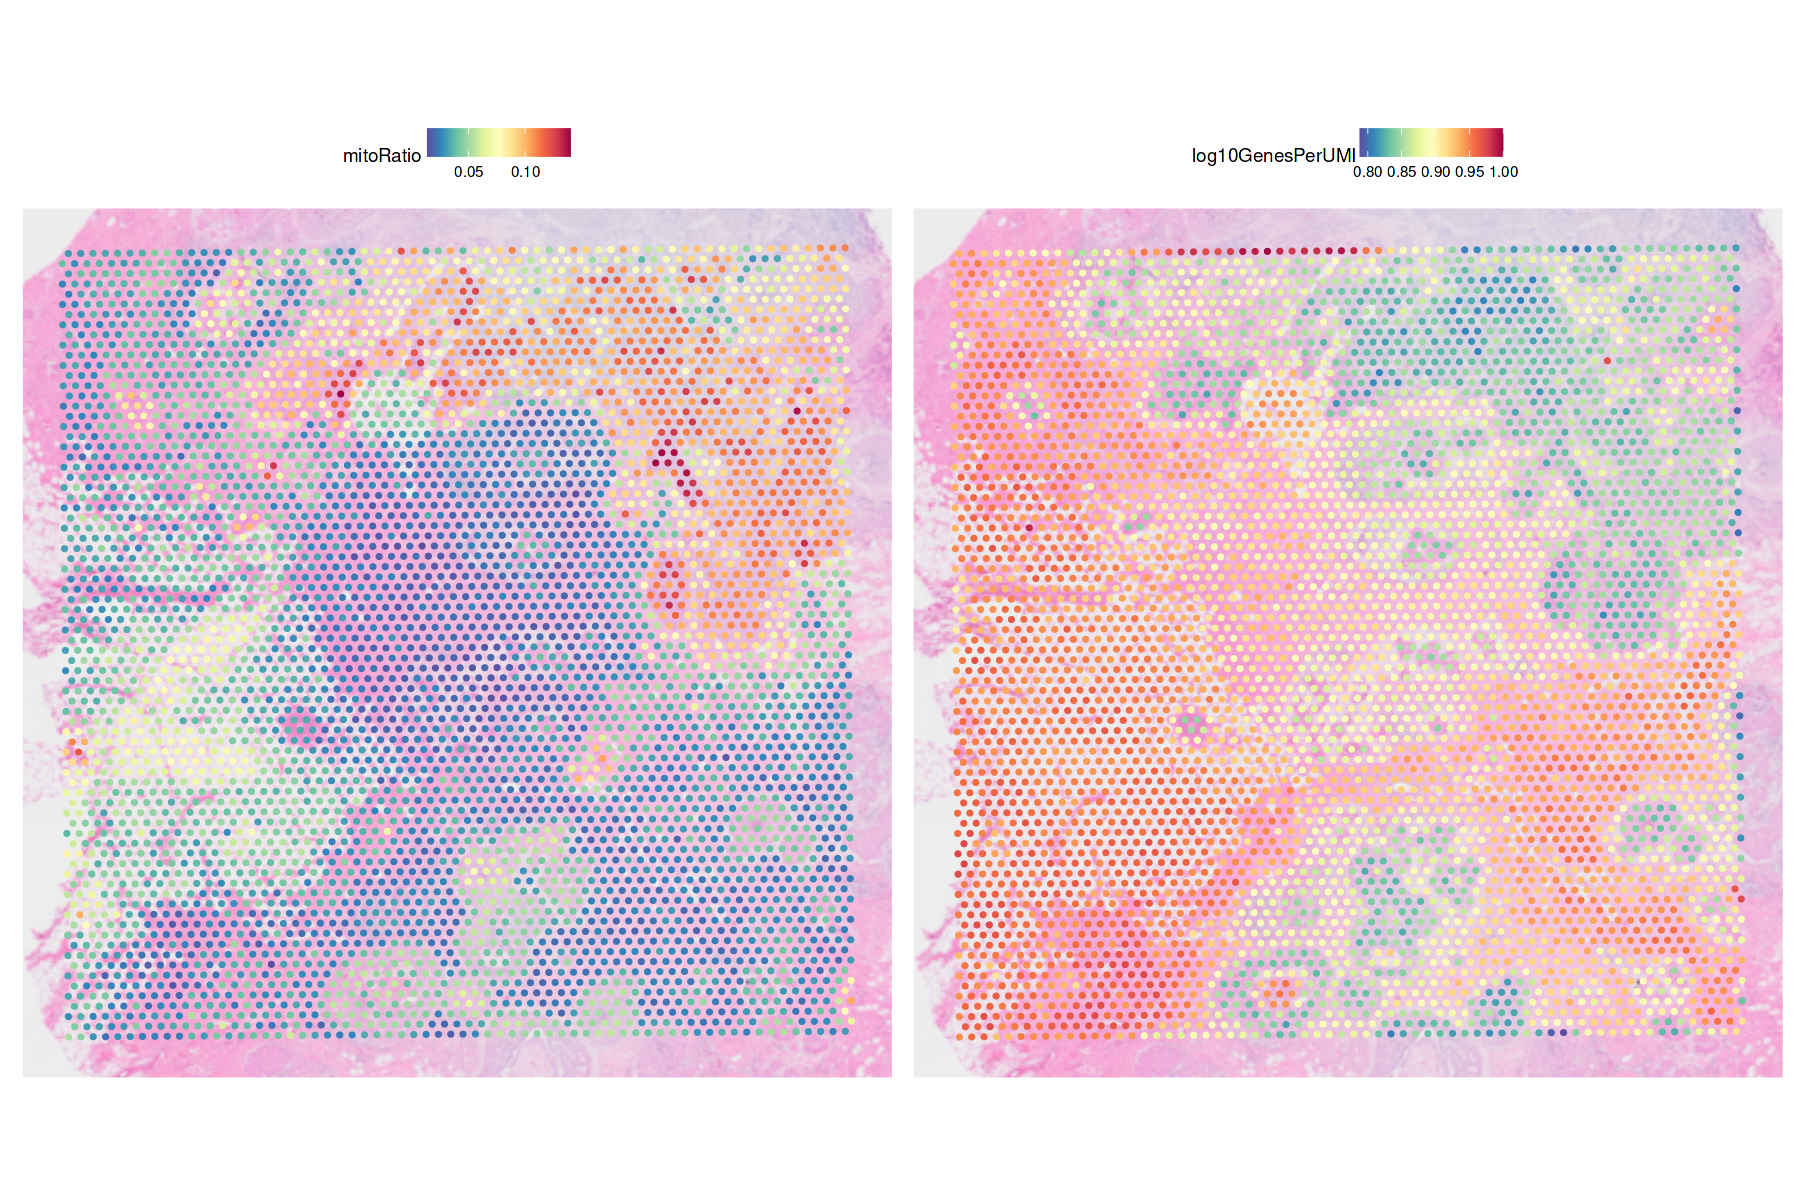

In [23]:
SpatialFeaturePlot(st, c("mitoRatio", "log10GenesPerUMI"))


In [24]:
dim(st)

[1] 18085  4992

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 29 rows containing non-finite outside the scale range
(`stat_density()`).”


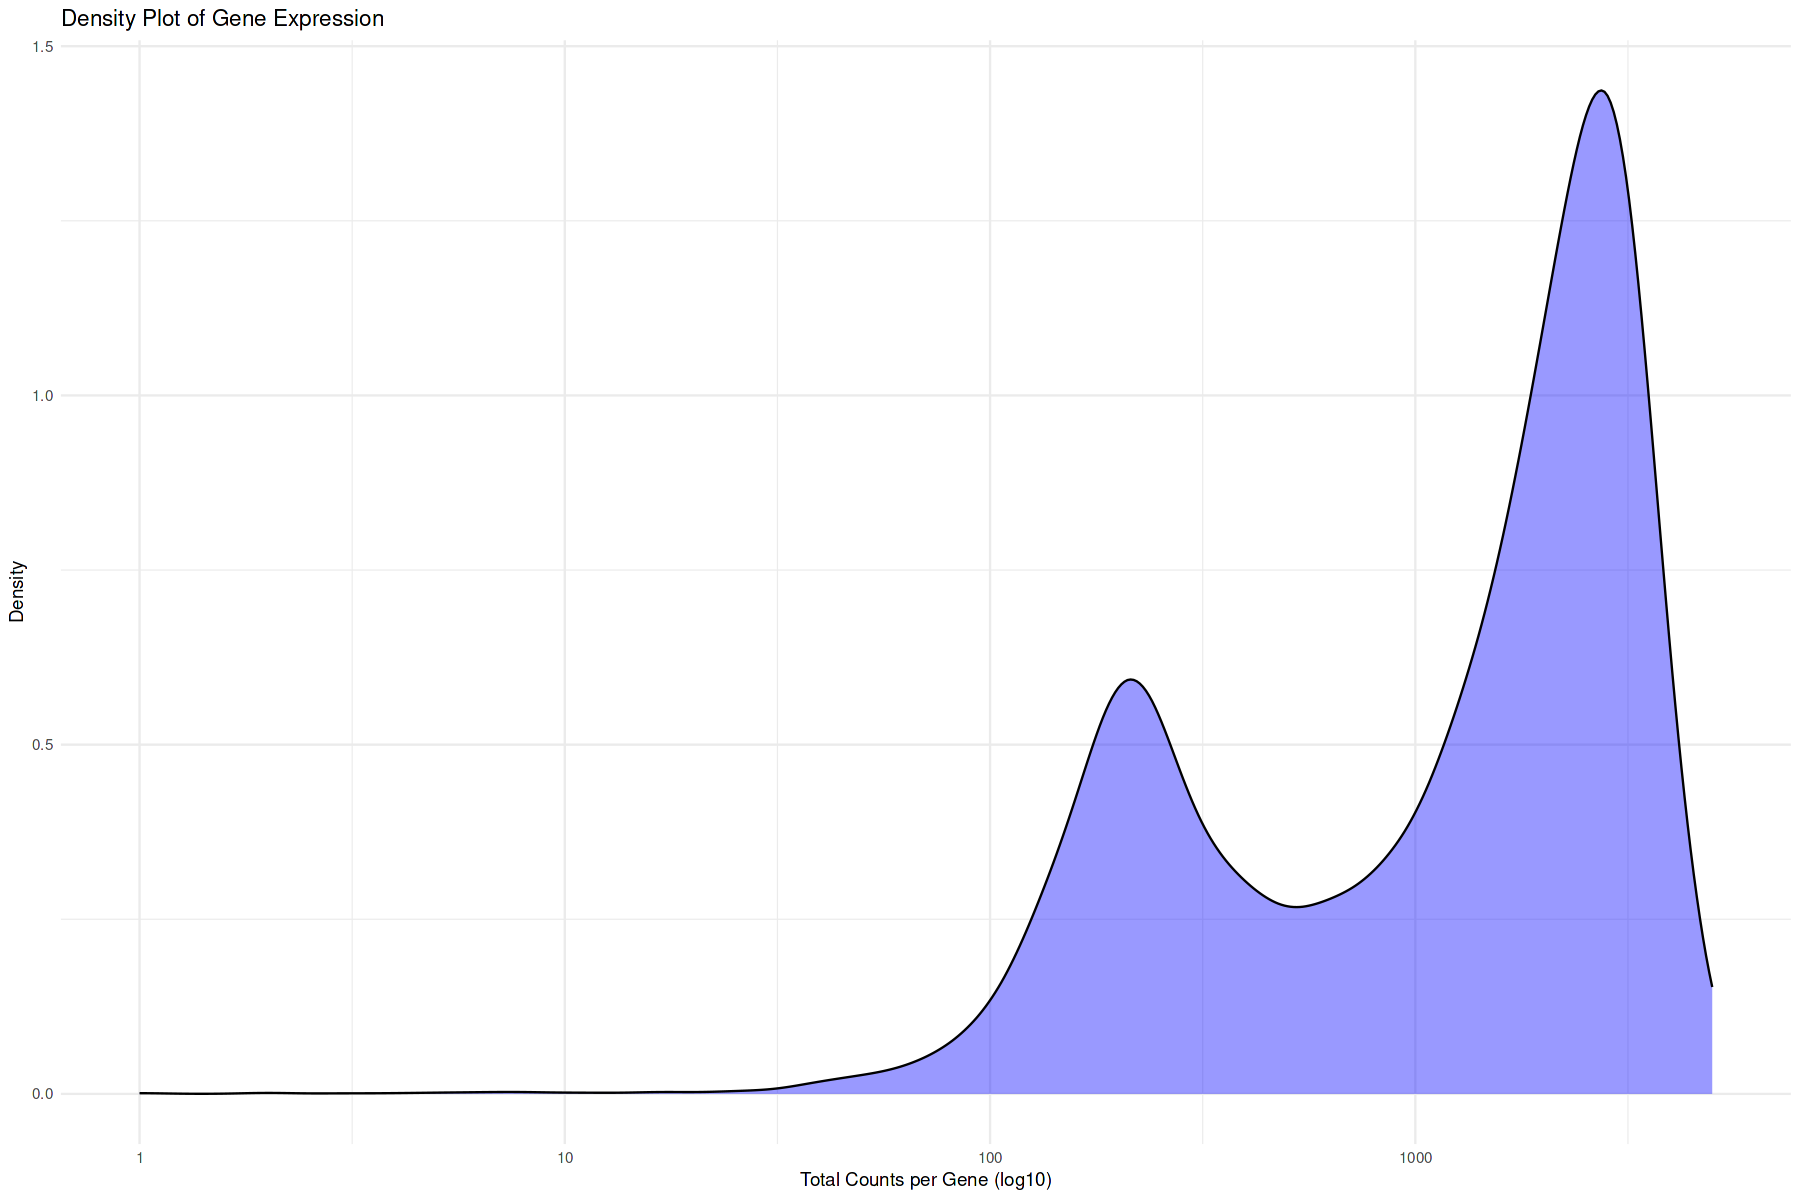

In [27]:
gene_sums <- rowSums(st@assays$Spatial$counts > 0)  # Sum of gene counts across spots
library(ggplot2)
gene_sums_df <- data.frame(Gene = names(gene_sums), Total_Counts = gene_sums)

ggplot(gene_sums_df, aes(x = Total_Counts)) +
  geom_density(fill = "blue", alpha = 0.4) +
  scale_x_log10() +  # Log scale for better visualization
  theme_minimal() +
  labs(title = "Density Plot of Gene Expression", x = "Total Counts per Gene (log10)", y = "Density")

In [29]:
min_spots <- 15
st <- subset(st,features = rownames(st)[Matrix::rowSums(st@assays$Spatial$counts > 0) > min_spots])


Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


In [30]:
dim(st)

[1] 18026  4992

In [ ]:
st <- SCTransform(st, assay ='Spatial')

Running SCTransform on assay: Spatial

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 18026 by 4992

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4992 cells



In [33]:
st <- FindVariableFeatures(st)
st <- RunPCA(st)


PC_ 1 
Positive:  CDH2, HMGCS2, DCAF7, FASN, TAT, SCD, MIEN1, PIP, MUC1, TACO1 
	   PVALB, ERBB2, ANKRD30A, ECM1, SLC12A2, CYB561, EPCAM, PGAP3, NRAS, CRIP1 
	   MLPH, PPM1D, FOXA1, HSP90AA1, FXYD3, KRT7, AZGP1, CSDE1, SREBF1, VMP1 
Negative:  IGHG1, IGKC, IGHA1, MMP2, C3, JCHAIN, CXCL12, COL14A1, RNASE1, PTGDS 
	   DCN, CCDC80, C1R, F13A1, SFRP4, PLTP, TNXB, SFRP2, C1S, FBLN1 
	   GPX3, SRPX, IGFBP4, OGN, EFEMP1, SERPINF1, FABP4, CPXM1, CCL19, CTSK 
PC_ 2 
Positive:  CDH2, HMGCS2, DCAF7, PVALB, ECM1, PIP, TAT, TACO1, NRAS, PSCA 
	   FABP4, CSDE1, FASN, FIBCD1, PHGDH, MIEN1, CYP24A1, CSTA, MUC1, IKZF2 
	   GPX3, ACE, FNDC11, HSP90AA1, TNXB, VANGL1, SIKE1, PPM1D, RRM2, PLTP 
Negative:  CEACAM6, KRT14, KRT17, SCGB2A2, TFF3, TFF1, CEACAM5, SERPINA3, IKZF3, KRT5 
	   KRT15, ITGB6, TACSTD2, KRT23, CD24, TSPAN1, AGR2, SPOP, CFB, UGT2B4 
	   PIGP, KRT6B, GABRP, MUC16, S100P, AREG, ITGA3, CPB1, MUC5B, PLAT 
PC_ 3 
Positive:  IL7R, CCL19, JCHAIN, IGHA1, TRAC, IGKC, TRBC2, CD52, LYZ, LTB 
	   TR

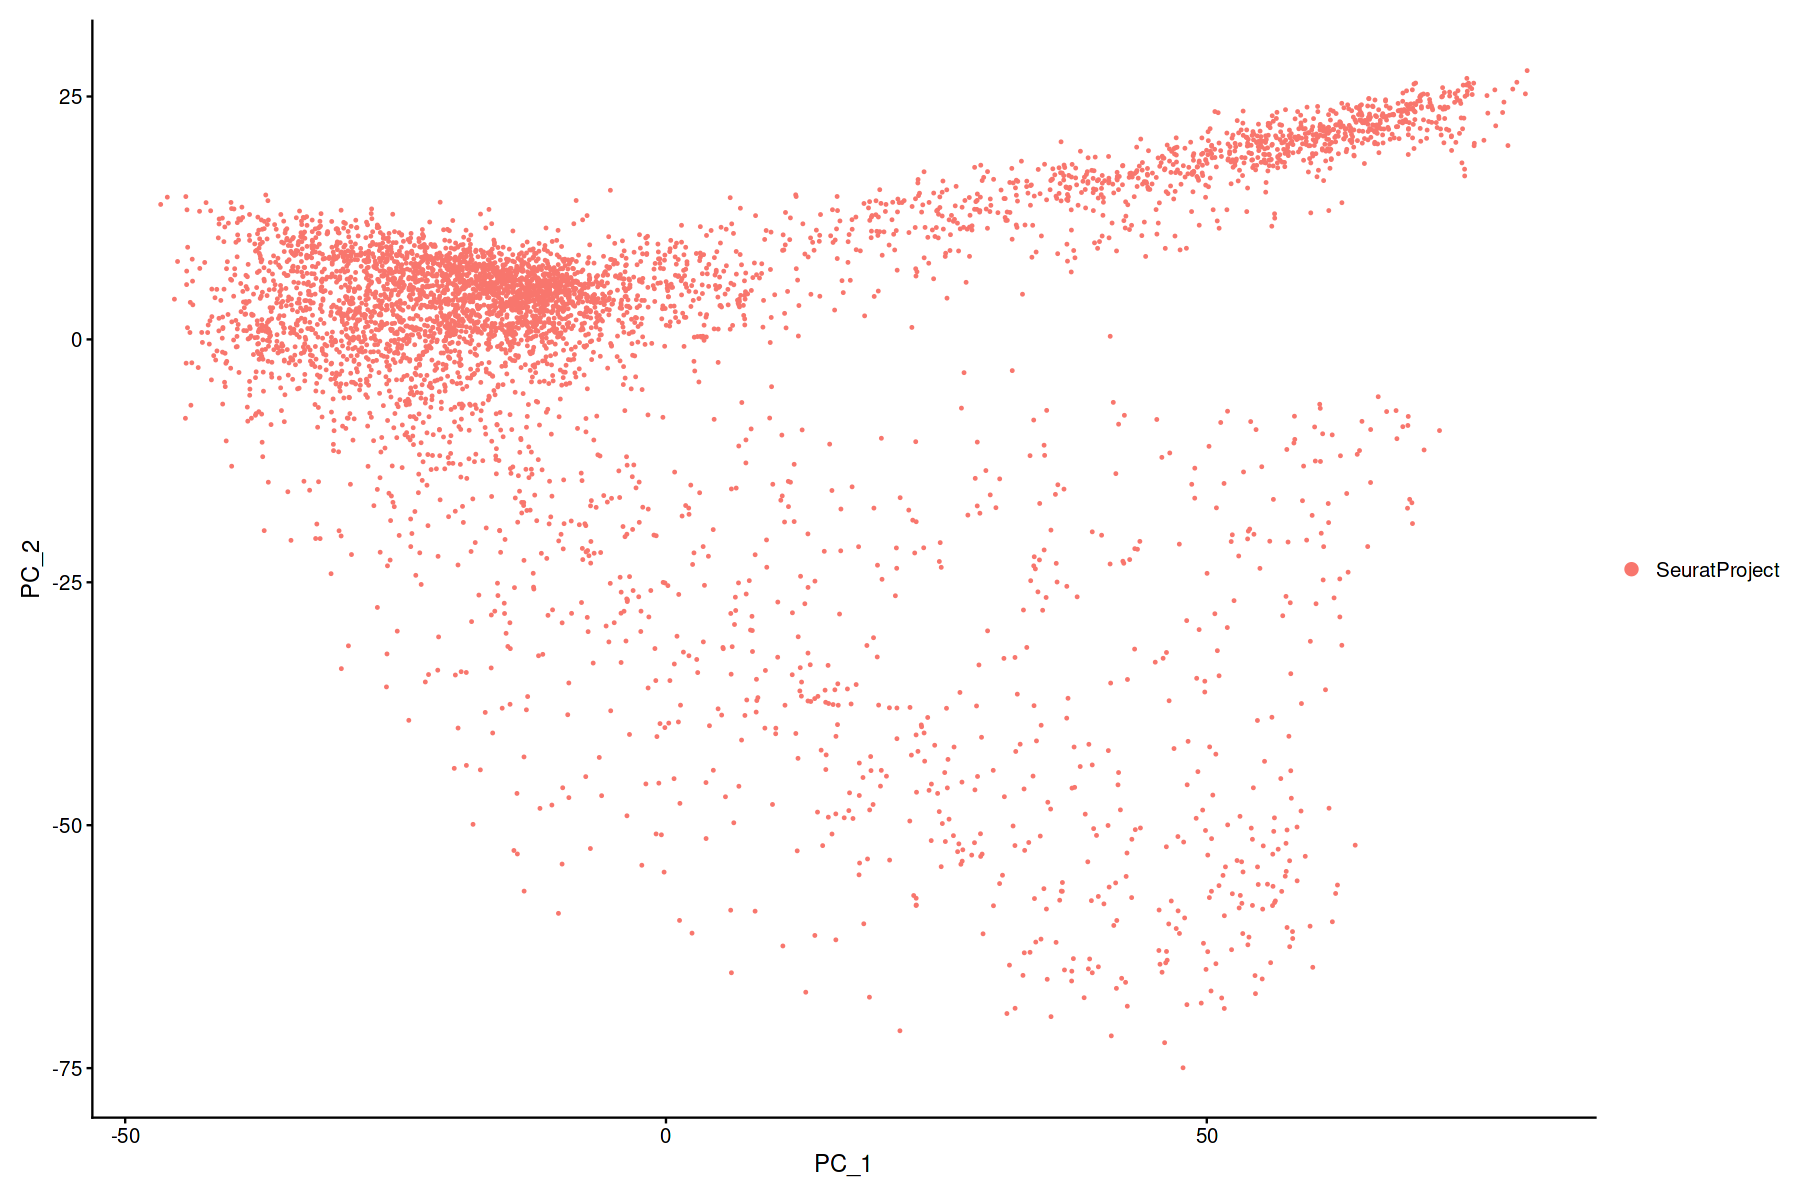

In [34]:
DimPlot(st,
        reduction = "pca")

In [146]:
SCTransform(st, assay ='Spatial')

Running SCTransform on assay: Spatial

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 7433 by 4992

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4992 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i)

An object of class Seurat 
14866 features across 4992 samples within 2 assays 
Active assay: SCT (7433 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: Spatial
 1 dimensional reduction calculated: pca
 1 spatial field of view present: spatial

In [149]:
n.cores=40


In [151]:
install.packages('Rnanoflann')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [152]:
st1 <- RunKODAMAmatrix(st,
                       FUN = "fastpls",
                       landmarks = 100000,
                       splitting = 300,
                       ncomp=50,
                       n.cores = n.cores
                       )

Calculating Network

Calculating Network spatial
socket cluster with 40 nodes on host ‘localhost’
Finished parallel computation

[1] "Calculation of dissimilarity matrix..."


In [201]:
saveRDS(st1,'processed.rds')

In [4]:
st1<- readRDS('processed.rds')

In [5]:
library(KODAMA)
library(KODAMAextra)
library(Seurat)

Loading required package: minerva

Loading required package: Rtsne

Loading required package: umap

Loading required package: Matrix


Attaching package: ‘KODAMA’


The following object is masked from ‘package:umap’:

    umap.defaults


Loading required package: parallel

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: e1071

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [6]:
config=umap.defaults
config$n_sgd_threads = "auto"
st1 <-RunKODAMAvisualization(st1,method="UMAP",config=config)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'plot': object 'kk_UMAP' not found


In [7]:
st1

An object of class Seurat 
7433 features across 4992 samples within 1 assay 
Active assay: Spatial (7433 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, KODAMA
 1 spatial field of view present: spatial

In [8]:
library(bluster)
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:Seurat’:

    components


The following object is masked from ‘package:KODAMA’:

    vertex


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [9]:
kodama_dims <- Embeddings(st1, reduction='KODAMA')

In [10]:
snn_graph <- bluster::makeSNNGraph(kodama_dims, k = 47) 

In [11]:
snn_graph

IGRAPH aac54af U-W- 4992 342621 -- 
+ attr: weight (e/n)
+ edges from aac54af:
 [1] 11--14 14--15 11--15  6--19 12--23 24--25  3--25  1--27 23--28 12--28
[11] 20--28 16--29  6--30 19--30 21--32 11--34 18--35 16--39 26--40 28--41
[21] 20--41 23--41 12--41 42--44 43--45 10--47 32--48 46--49  4--50 44--51
[31] 42--51 18--52 35--52 22--53 13--55 23--55 12--55  8--56 42--56 44--56
[41] 50--57  4--57 16--58 39--58 34--59 11--59 33--60 10--61 15--63 63--64
[51] 61--65 10--65 26--66  5--67 40--68 66--68 26--68  3--69 25--69 32--70
[61] 21--70 56--71  8--71 42--71 59--72 34--72 11--72 17--73 74--75 13--75
[71] 55--75 23--75  9--76 14--77 11--77 15--77 34--77 58--78 16--78 51--79
+ ... omitted several edges

In [12]:

clusters <- igraph::cluster_walktrap(snn_graph)


cluster_labels <- as.character(membership(clusters))

In [13]:
st1@meta.data$clusters <- cluster_labels


In [14]:
df=data.frame(kodama_dims)
df['KODAMA']=st1@meta.data$clusters

In [15]:
head(df)

Dimensions_1 Dimensions_2 KODAMA
AACACCTACTATCGAA-1 -2.1695335    2.2217486   2     
AACACGTGCATCGCAC-1  2.3236360    3.3312252   15    
AACACTTGGCAAGGAA-1  5.3087086   -0.1651335   11    
AACAGGAAGAGCATAG-1  1.7758360    2.2621253   8     
AACAGGATTCATAGTT-1  0.6183141    1.7745794   8     
AACAGGCCAACGATTA-1 -4.9770517    2.0259749   12

In [16]:
library(ggplot2)

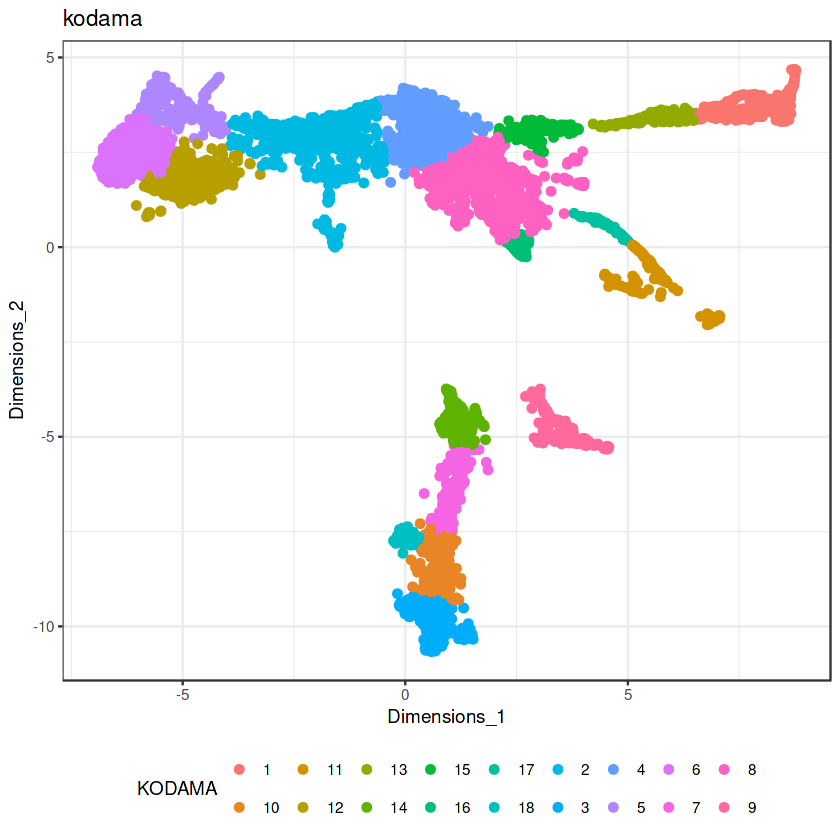

In [17]:
ggplot(df, aes(Dimensions_1, Dimensions_2, color = KODAMA)) +labs(title="kodama") +
  geom_point(size = 2) +
  theme_bw() + theme(legend.position = "bottom")+
  guides(color = guide_legend(nrow = 2, 
                              override.aes = list(size = 2)))

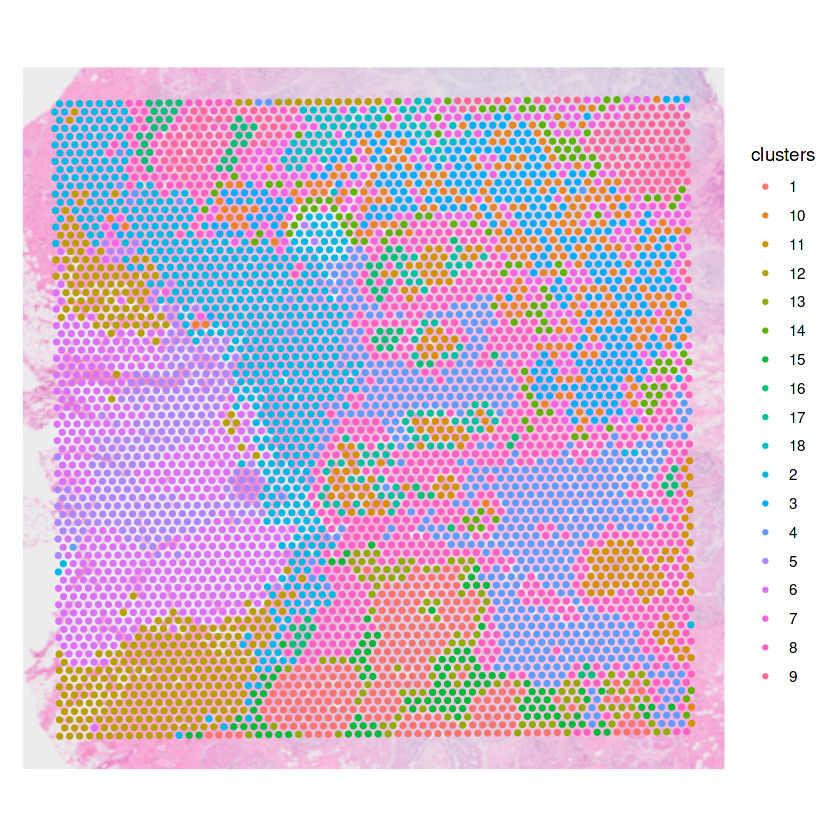

In [18]:
SpatialDimPlot(st1, group.by='clusters',pt.size.factor=2)